# Importing libraries📚

In [ ]:
!pip3 install seaborn==0.11.0
!pip install seaborn==0.11.0

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
import pandas as pd
import seaborn as sns
import datatable as dt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from colorama import Fore, Back, Style
red = Fore.RED
grn = Fore.GREEN
blu = Fore.BLUE
ylw = Fore.YELLOW
wht = Fore.WHITE

import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [ ]:
print(sns.__version__) 
'''We use seaborn version 0.11.0 to use histplot in PairPlot'''

# Getting data 💽

In [ ]:
path = '../input/tabular-playground-series-jan-2021/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
sample = pd.read_csv(path + 'sample_submission.csv')

In [ ]:
print(f'{train.shape}\n{test.shape}\n{sample.shape}')

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
sample.head()

In [ ]:
print('number of null columns in train set :- ',np.sum(train.isnull().sum() > 0))
print('number of null columns in test set :-',np.sum(test.isnull().sum() > 0 ))

We see that there are no null values in train and test set

In [ ]:
features = [f'cont{x}'for x in range(1,15)]
target = ['target']

In [ ]:
all_data = train[features+['id']].append(test)

In [ ]:
all_data.head()

# EDA 📊📊

In [ ]:
def plot_distribution(ds,feature,color):
    plt.figure(dpi=125)
    sns.distplot(ds[feature],color=color);
    print("{}Max value of {} is {}\n{}Min value of {} is {}\n{}Mean value of {} is {}\n{}Std value of {} is {}\n{}Median value of {} is {}".format(red,feature,ds[feature].max(),blu,feature,ds[feature].min(),grn,feature,ds[feature].mean(),ylw,feature,ds[feature].std(),wht,feature,ds[feature].median()));

## Pair Grid

In [ ]:
def plot_grid(ds,c1,c2,c3):
    f = sns.PairGrid(ds[:100]);
    plt.figure(figsize=(10,10));
    f.map_upper(plt.scatter,color = c1);
    f.map_lower(sns.kdeplot,color = c2);
    #f.map_diag(sns.histplot,color = c3 );
    f.map_diag(sns.kdeplot, lw=3, legend=False,color = c3);

### Train Data

In [ ]:
plot_grid(all_data[features],'lightgreen','magenta','red');

### Test Data

In [ ]:
plot_grid(test,'limegreen','darkmagenta','seagreen');

##  Correlation Matrix 🎵🎵

In [ ]:
corr1,corr2,corr3 = train[features].corr(),train[features].corr(method='pearson'),train[features].corr(method='spearman');
plt.figure(figsize=(12,9));
fig = ex.imshow(corr1);
fig.show();

cont 6 to cont 13 are somewhat related.. not much though

In [ ]:
plt.figure(figsize=(12,9))
fig2 = sns.heatmap(corr2, annot=True, cmap="mako")
plt.show()

In [ ]:
plt.figure(figsize=(12,9))
fig2 = sns.heatmap(corr3, annot=True, cmap="rocket_r")
plt.show()

## Feature Distibutions 📈📈

In [ ]:
plt.figure(figsize=(30,15))
plt.subplot(3,5,1)
sns.kdeplot(train['cont1'],color='#4285F4',shade=True,alpha=0.8);
plt.subplot(3,5,2)
sns.kdeplot(train['cont2'],color='#7D0552',shade=True,alpha=0.8);
plt.subplot(3,5,3)
sns.kdeplot(train['cont3'],color='#7FFFD4',shade=True,alpha=0.8);
plt.subplot(3,5,4)
sns.kdeplot(train['cont4'],color='#C04000',shade=True,alpha=0.8);
plt.subplot(3,5,5)
sns.kdeplot(train['cont5'],color='#4285F4',shade=True,alpha=0.8);
plt.subplot(3,5,6)
sns.kdeplot(train['cont6'],color='#F88017',shade=True,alpha=0.8);
plt.subplot(3,5,7)
sns.kdeplot(train['cont7'],color='#4285F4',shade=True,alpha=0.8);
plt.subplot(3,5,8)
sns.kdeplot(train['cont8'],color='#78C7C7',shade=True,alpha=0.8);
plt.subplot(3,5,9)
sns.kdeplot(train['cont9'],color='#728C00',shade=True,alpha=0.8);
plt.subplot(3,5,10)
sns.kdeplot(train['cont10'],color='#254117',shade=True,alpha=0.8);
plt.subplot(3,5,11)
sns.kdeplot(train['cont11'],color='#6CC417',shade=True,alpha=0.8);
plt.subplot(3,5,12)
sns.kdeplot(train['cont12'],color='#CCFB5D',shade=True,alpha=0.8);
plt.subplot(3,5,13)
sns.kdeplot(train['cont13'],color='#6A287E',shade=True,alpha=0.8);
plt.subplot(3,5,14)
sns.kdeplot(train['cont14'],color='#E3319D',shade=True,alpha=0.8);
plt.subplot(3,5,15)
sns.kdeplot(train['target'],color='#E3319D',shade=True,alpha=0.8);

We can see some similarities between some of the features🤔🤔

In [ ]:
plot_distribution(train,'target','blue')

We see 2 spikes from the median of the distribution. We can split the dataset from the medain. Suggested by [maunish](https://www.kaggle.com/maunish).

In [ ]:
lesser,greater = train[train['target'] <= train['target'].median()],train[train['target'] >= train['target'].median()] 

In [ ]:
plt.figure(figsize=(30.8,15))
plt.subplot(3,5,1)
sns.kdeplot(lesser['cont1'],color='#4285F4',shade=True,alpha=0.2);
sns.kdeplot(greater['cont1'],color='#4F2083',shade=True,alpha=0.8);
plt.subplot(3,5,2)
sns.kdeplot(lesser['cont2'],color='#7D0852',shade=True,alpha=0.2);
sns.kdeplot(greater['cont2'],color='#43A45F',shade=True,alpha=0.8);
plt.subplot(3,5,3)
sns.kdeplot(lesser['cont3'],color='#350836',shade=True,alpha=0.2);
sns.kdeplot(greater['cont3'],color='#7FFFD4',shade=True,alpha=0.8);
plt.subplot(3,5,4)
sns.kdeplot(lesser['cont4'],color='#C08408',shade=True,alpha=0.2);
sns.kdeplot(greater['cont4'],color='#DA6DBD',shade=True,alpha=0.8);
plt.subplot(3,5,5)
sns.kdeplot(lesser['cont5'],color='#4285F4',shade=True,alpha=0.2);
sns.kdeplot(greater['cont5'],color='#FD376A',shade=True,alpha=0.8);
plt.subplot(3,5,6)
sns.kdeplot(lesser['cont6'],color='#F88017',shade=True,alpha=0.2);
sns.kdeplot(greater['cont6'],color='#508352',shade=True,alpha=0.8);
plt.subplot(3,5,7)
sns.kdeplot(lesser['cont7'],color='#4285F4',shade=True,alpha=0.2);
sns.kdeplot(greater['cont7'],color='#1FCDCB',shade=True,alpha=0.8);
plt.subplot(3,5,8)
sns.kdeplot(lesser['cont8'],color='#A3FC08',shade=True,alpha=0.2);
sns.kdeplot(greater['cont8'],color='#78C7C7',shade=True,alpha=0.8);
plt.subplot(3,5,9)
sns.kdeplot(lesser['cont9'],color='#EDEE2C',shade=True,alpha=0.2);
sns.kdeplot(greater['cont9'],color='#728C08',shade=True,alpha=0.8);
plt.subplot(3,5,10.8)
sns.kdeplot(lesser['cont10'],color='#254117',shade=True,alpha=0.2);
sns.kdeplot(greater['cont10'],color='#9717A9',shade=True,alpha=0.8);
plt.subplot(3,5,11)
sns.kdeplot(lesser['cont11'],color='#6CC417',shade=True,alpha=0.2);
sns.kdeplot(greater['cont11'],color='#872B93',shade=True,alpha=0.8);
plt.subplot(3,5,12)
sns.kdeplot(lesser['cont12'],color='#C13408',shade=True,alpha=0.2);
sns.kdeplot(greater['cont12'],color='#CCFB5D',shade=True,alpha=0.8);
plt.subplot(3,5,13)
sns.kdeplot(lesser['cont13'],color='#6A287E',shade=True,alpha=0.2);
sns.kdeplot(greater['cont13'],color='#CCFB5D',shade=True,alpha=0.8);
plt.subplot(3,5,14)
sns.kdeplot(lesser['cont14'],color='#E3319D',shade=True,alpha=0.2);
sns.kdeplot(greater['cont14'],color='#203E8B',shade=True,alpha=0.8);
plt.subplot(3,5,15)
sns.kdeplot(lesser['target'],color='#D8AB59',shade=True,alpha=0.2);
sns.kdeplot(greater['target'],color='#C61923',shade=True,alpha=0.8);

# Trying some things on target

#### I think 0.0 value for target is an outlier..

In [ ]:
train = train[train['target'] > 0]

In [ ]:
plot_distribution(train,'target','purple')

#### As we can see it was an outlier

# PyTorch Neural Network❤️‍🔥

In [ ]:
from torch.utils.data.dataloader import DataLoader
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import MinMaxScaler
torch.manual_seed(7)

## Metrics 📐

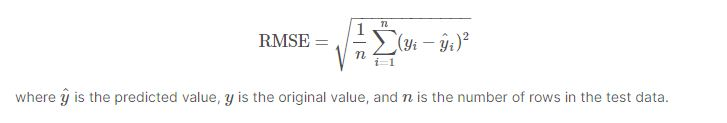

In [ ]:
def rmse_score(yhat, yreal):
    return (sqrt(mean_squared_error(yreal, yhat.detach().numpy())))

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from math import sqrt

## Model

In [ ]:
class TPSnn(nn.Module):
    def __init__(self,in_size,hidden_size1,hidden_size2,hidden_size3,hidden_size4,num_classes):
        super().__init__()
        self.linear1 = nn.Linear(in_size, hidden_size1)
        self.linear2 = nn.Linear(hidden_size1, hidden_size2)
        self.linear3 = nn.Linear(hidden_size2,hidden_size3)
        self.linear4 = nn.Linear(hidden_size3,hidden_size4)
        self.linear5 = nn.Linear(hidden_size4,num_classes)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self,xb):
        xb = xb.view(-1,xb.size(1)).float()
        #xb = xb.float()
        out = self.linear1(xb)
        #out = self.dropout(out)
#         out = F.relu(out)
        out = self.linear2(out)
        #out = self.dropout(out)
        #out = F.relu(out)
        out = self.linear3(out)
        #out = self.dropout(out)
        out = F.relu(out)
#         out = self.linear4(out)
#         out = self.dropout(out)
#         #out = F.relu(out)
#         out = self.linear5(out)
#         out = F.relu(out)
        return out
    
    def training_step(self,batch):
        features, labels = batch
        out = self(features)
#         loss_x = F.mse_loss
#         loss = loss_x(out,labels)
        loss_x = nn.MSELoss()
        loss = torch.sqrt(loss_x(out,labels))
        return loss
    
    def validation_step(self,batch):
        features,labels = batch
        out = self(features)
#         loss_x = F.mse_loss
#         loss = (loss_x(out,labels))
        loss_x = nn.MSELoss()
        loss = torch.sqrt(loss_x(out,labels))
        return {'RMSE': loss}

    def validation_epoch_end(self,outputs):
        batch_losses = [x['RMSE'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
#         batch_accs = [x['valid_acc'] for x in outputs]
#         epoch_acc = torch.stack((batch_accs).t).mean()
        return {'RMSE': epoch_loss.item()}

    def epoch_end(self,epoch,result):
        print("Epoch [{}], RMSE: {:.4f}".format(epoch, result['RMSE']))#, result['valid_acc']

In [ ]:
def convert_to_tensors(ds, valid_size = 0.30,train_set=True):
    
    batch_size = 60000#int(ds.shape[0]//3.5)
    scaler = MinMaxScaler()
    
    if(train_set == True):
        
        targets_t = ds.target.values
        features_t = ds.drop(labels = ['target'],axis = 1).values
        
        features_t = scaler.fit_transform(features_t)
        
        targetsTrain = torch.from_numpy(targets_t).type(torch.FloatTensor)
        featuresTrain = torch.from_numpy(features_t)
        
        train_tensor = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
        
        valid_size = round(len(train_tensor) * (valid_size))
        train_size = len(train_tensor) - valid_size

        ttrain_ds, tvalid_ds = random_split(train_tensor, [train_size, valid_size])
        
        print("train_size:- ",len(ttrain_ds),"test_size:- ", len(tvalid_ds))
              
        train_loader = DataLoader(ttrain_ds, batch_size = batch_size, shuffle=True, num_workers=4, pin_memory=True)
        valid_loader = DataLoader(tvalid_ds, batch_size = batch_size, num_workers=4, pin_memory=True)
              
        return train_loader,valid_loader
    
    else:
        
        featuresTest = ds.values
        featuresTest = scaler.fit_transform(featuresTest)
        featuresTensor = torch.from_numpy(featuresTest)
        print(len(featuresTensor))
        test_loader = DataLoader(featuresTensor, batch_size*2, num_workers=4, pin_memory = True)
        
        return test_loader

In [ ]:
train.shape

In [ ]:
train_loader,valid_loader = convert_to_tensors(train)

In [ ]:
input_size = train.shape[1] -1
hidden_size1 = 128
hidden_size2 = 1024
hidden_size3 = 64
hidden_size4 = 8
num_classes = 1

In [ ]:
model = TPSnn(input_size, hidden_size1=hidden_size1, hidden_size2= hidden_size2,hidden_size3 = hidden_size3,hidden_size4 = hidden_size4,num_classes = num_classes)
model

In [ ]:
for t in model.parameters():
    print(t.shape)

In [ ]:
for xb,yb in train_loader:
    print(xb,'yb',yb)
    break

In [ ]:
for data, labels in train_loader:
    outputs = model(data)
    print(labels.shape)
    loss_x = nn.MSELoss()
    loss = torch.sqrt(loss_x(outputs,labels))
    #acc = rmse_score(outputs,labels)
    print('Loss:', loss.item())
    #print('Initial Acc:',float(acc),"%")
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:10].data)
print('Sample labels :\n', labels[:10].data)

In [ ]:
def evaluate(model, valid_loader):
    outputs = [model.validation_step(batch) for batch in valid_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
def fit(epochs, lr, model, train_loader, valid_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in tqdm(range(epochs)):
        # Training ==>
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        # Validation ==>
        result = evaluate(model,valid_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = TPSnn(input_size,hidden_size1=hidden_size1, hidden_size2= hidden_size2, hidden_size3= hidden_size3,hidden_size4 = hidden_size4,num_classes = num_classes)
model

In [ ]:
history = [evaluate(model,valid_loader)]
history

In [ ]:
history += fit(12, 0.02, model, train_loader, valid_loader) #Learning Rate = 0.5

In [ ]:
history += fit(20, 0.0001, model, train_loader, valid_loader)

In [ ]:
history += fit(60, 0.00001, model, train_loader, valid_loader)

In [ ]:
#history += fit(60, 0.00003, model, train_loader, valid_loader)

## preds

In [ ]:
for xb,yb in valid_loader:
    print(xb,'yb',yb)

In [ ]:
def predict(model,preds,train=False):
    y = torch.FloatTensor()
    if train == True:
        for pred,lbl in preds:
            y_ = model(pred)
            y = torch.cat((y,y_),dim=0)
        return y
    if train != True:
        for pred in preds:
            y_ = model(pred)
            y = torch.cat((y,y_),dim=0)
        return y

In [ ]:
test_loader = convert_to_tensors(test,train_set = False)

In [ ]:
train_preds = predict(model,train_loader,train=True)

In [ ]:
train_preds2 = predict(model,valid_loader,train=True)

In [ ]:
f'{train_preds.size()},{train_preds2.size()}'

In [ ]:
train_preds = torch.cat((train_preds,train_preds2),dim=0)

In [ ]:
train_preds = train_preds.detach().cpu().numpy()

In [ ]:
train['t_preds'] = train_preds

In [ ]:
sns.jointplot(x = 'target', y = 't_preds',data = train,joint_kws={'alpha' : 0.3},color = 'goldenrod');
plt.show()

# My Submission 🙋‍♂️

In [ ]:
preds = predict(model,test_loader)

In [ ]:
preds = preds.detach().cpu().numpy()

In [ ]:
preds = preds.reshape(-1)

In [ ]:
sub = pd.DataFrame({'id':test.id, 'target':preds})
sub.to_csv('submission.csv',index=False)

In [ ]:
sub.head()

In [ ]:
x = pd.read_csv('./submission.csv')
x.head()

# Work in Progress🚧🚧

## A lot of work is remaining to be done here 😅😅...i have lots of things to try here😋😋.. lots of improvements to make🔧🔧.. i'll get to it as soon as i can⏱️⏱️.. 